# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

In this notebook we face up to another algorithm (Simulated Annealing) useful to solve optimization problems and to the Message Passing Interface (MPI).

## Exercise 10.1

In the first exercise we adapt the code used in the ninth exercise in order to solve the same TSP problem with Simulated Annealing (SA) algorithm.

The idea behind Simulated Annealing algorithm is to exploit a virtual cooling of the system through which the latter reaches the minimum value of the energy. If we consider the energy of the system as the cost function to be minimized (length of the route $L(x)$) and take into account the Boltzmann distribution $p(x) =\frac{\exp\{-\beta L(x)\}}{Z}$, then such a process leads to the solution of the optimization problem, i.e. to the minimum of $L(X)$.

Pratically the temperature, which starts from a positive value, decreases slowly towards zero and, for each temperature step, the Simulated Annealing algorithm chooses a different configuration near the actual one; after measuring its goodness, the algorithm decides to move to it dependig on a given probability.

In particular, given a configuration $x$ at a certain temperature $t = \frac{1}{\beta}$ with energy $L(x)$, a new configuration $x'$ replaces the older one with probability:
$$ P(x) = \begin{align}
\begin{cases}
\exp{-\beta (L(x') - L(x))}&\text{if $L(x') > L(x)$}\\
1&\text{otherwise}\\
\end{cases}
\end{align}
$$

At any given temperature we sample the configurations according to their probability. So, at high temperature are accepted, with almost equal probability, both moves, with or against the gradient. Instead, as the temperature drops, only movements that follow the gradient are accepted.
The probability defined above comes into play following a precise annealing schedule $\{(\beta_{1}, n_{1}), (\beta_{2}, n_{2}), (\beta_{3}, n_{3}), \dots, (\beta_{N}, n_{N})\}$ through which we set the number of times the algorithm proposes a new configuration. 

In order to have a good annealing and do not lose the ergodicity of the system, we have to go very slow with the cooling process. For this reason we decide to decrease the temperature multiplying the actual temperature for a decay rate $\gamma \in (0.7, 1)$: $$ T_{i+1}= \gamma T_{i}$$

Finally, since we don't want to stop in a local minimum, we can perceive by intuition that the cooler the system, the greater the number of steps for Metropolis. Indeed, increasing the number of steps for decreasing temperature  grants to reduce the probability to find a minimum that is not global. For this reason the input file contains the number of metropolis steps that we want to do for the last temperature. The number of steps for the other temperatures are calculated from that final value.

As already said, we have to mix Genetic Algorithm and Metropolis algorithm in order to have a correct Simulated Annealing. Thus, we adapt the code of exercises 9 and 5.
From the ninth exercise we use all the parts relative to the GA, except the crossover and the selection: indeed in this case we just have the annealation, i.e. a kind of mutation, acting with probability 1, that proposes new configurations. From the fifth exercise we use the part relative to the Metropolis.

## Circumference

As in the exercise 9 we perform the calculations both, with cities on a circumference and with cities in a square.
For both cases we decide to use the following parameters:
1. initial temperature: $T_0 = 400$;
2. decay rate: $\gamma = 0.966$
3. number of temperature steps: $n_{temp\_steps} = 400$
4. number of Metropolis steps: $n_{metrop\_steps} = 50000$

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
x_best_circ, y_best_circ = np.loadtxt("data/data_10.1/circumference/Best_route.dat", usecols=(0,1), unpack=True)
x_circ, y_circ = np.loadtxt("data/data_10.1/circumference/pos_cities.dat", usecols=(0,1), unpack=True)
n_cities=len(x_best_circ)

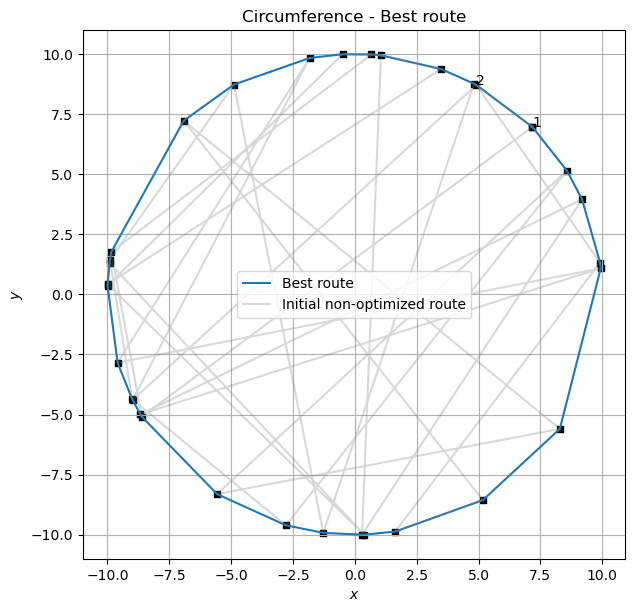

In [3]:
figure = plt.figure(figsize=(7,7), dpi=100)
plt.plot(x_best_circ,y_best_circ, label="Best route")

plt.annotate(str(1), (x_best_circ[0], y_best_circ[0]))  
plt.annotate(str(2), (x_best_circ[1], y_best_circ[1]))
plt.plot(x_circ,y_circ, color='grey', alpha=0.3, label="Initial non-optimized route")
plt.scatter(x_best_circ,y_best_circ, marker ='s', s=20, color = 'black')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title('Circumference - Best route')
plt.grid(True)
plt.legend()

plt.show()

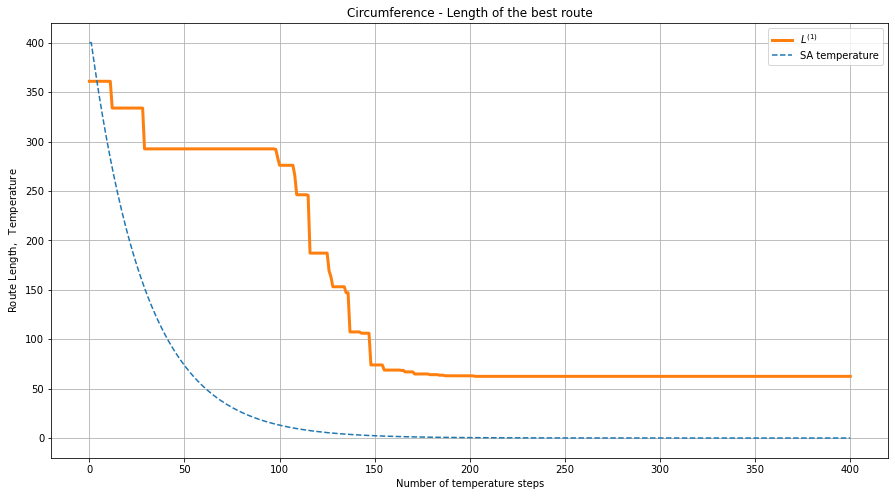

Length of the best route after 400 steps: 62.403
Final temperature after 400 steps: 0.000405446


In [111]:
gen_circ, l_circ = np.loadtxt("data/data_10.1/circumference/Best_lengths.dat", usecols=(0,2), unpack=True)
temp_circ = np.loadtxt("data/data_10.1/circumference/Best_lengths.dat", usecols=(1), unpack=True)

fig= plt.figure(figsize=(15,8))
plt.xlabel('Number of temperature steps')
plt.ylabel('Route Length' "$ , \, \, \, \,   $" 'Temperature')
plt.title('Circumference - Length of the best route')
plt.plot(gen_circ,l_circ, linewidth = 3, color = 'C1', label="$L^{(1)}$")
plt.plot(gen_circ,temp_circ, linestyle='dashed', label="SA temperature")
plt.legend()
ax_left.legend()
plt.grid(True)
plt.show()


gen, t_fin, best = np.loadtxt("data/data_10.1/circumference/Best_lengths.dat", usecols=(0,1,2), unpack=True)
print("Length of the best route after", int(gen[-1]), "steps:", best[-1])
print("Final temperature after", int(gen[-1]), "steps:", t_fin[-1])

In the above plots we show the best route and the trend of the best length as a funtion of the number of temperature steps. In particular, in the last graph, we also plot the temperature as a function of the number of steps (the scale is the same, but the unit is different). We can observe that the result obtained is the identical to the result obtained with genetic algortithm in exercise 9.

## Square

As already said, we use the same parameters of the cirumference case.

In [28]:
x_best_sq, y_best_sq = np.loadtxt("data/data_10.1/square/Best_route.dat", usecols=(0,1), unpack=True)
x_sq, y_sq = np.loadtxt("data/data_10.1/square/pos_cities.dat", usecols=(0,1), unpack=True)
n_cities=len(x_best_sq)

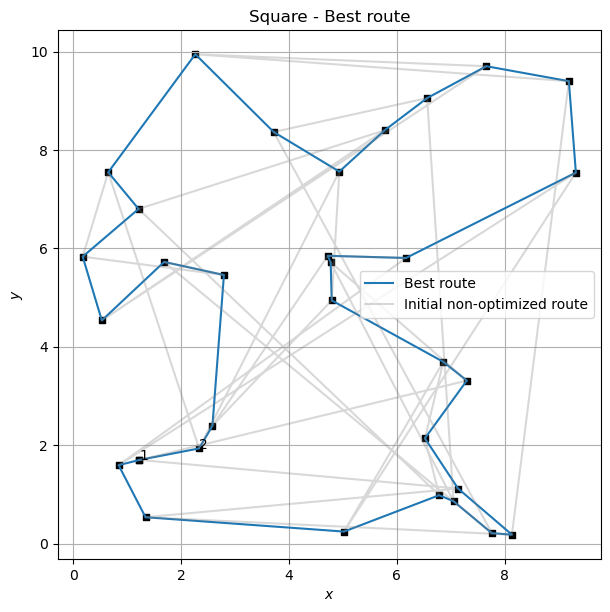

In [29]:
figure = plt.figure(figsize=(7,7), dpi=100)
plt.plot(x_best_sq,y_best_sq, label="Best route")
#for i in range(n_cities):
 #   plt.annotate(str(i), (x_best[i],y_best[i]))

plt.annotate(str(1), (x_best_sq[0], y_best_sq[0]))  
plt.annotate(str(2), (x_best_sq[1], y_best_sq[1]))
plt.plot(x_sq,y_sq, color='grey', alpha=0.3, label="Initial non-optimized route")
plt.scatter(x_best_sq,y_best_sq, marker ='s', s=20, color = 'black')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title('Square - Best route')
plt.grid(True)
plt.legend()

plt.show()

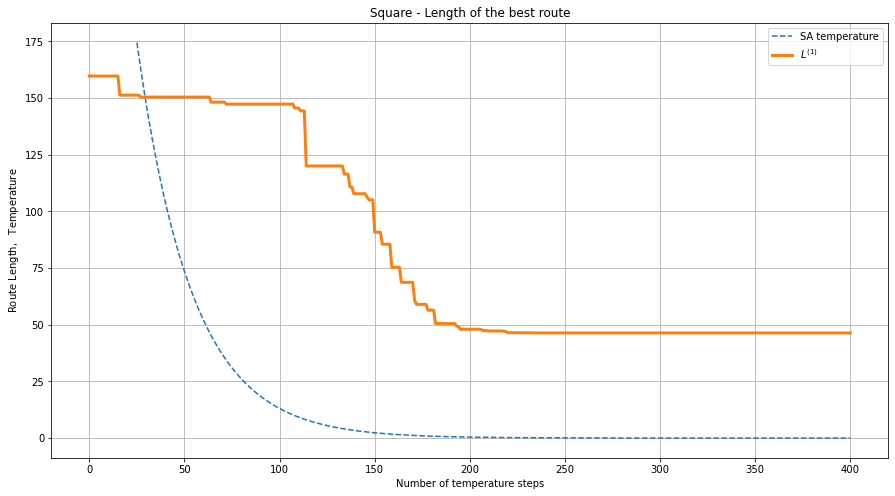

Length of the best route after 400 steps: 46.3666
Final temperature after 400 steps: 0.000405446


In [110]:
gen_sq, l_sq = np.loadtxt("data/data_10.1/square/Best_lengths.dat", usecols=(0,2), unpack=True)
gen_sq_t, temp_sq = np.loadtxt("data/data_10.1/square/Best_lengths.dat", usecols=(0, 1), skiprows = 25, unpack=True)

fig= plt.figure(figsize=(15,8))
plt.plot(gen_sq_t,temp_sq, linestyle='dashed', label="SA temperature")
plt.plot(gen_sq,l_sq, linewidth = 3, label="$L^{(1)}$")
plt.xlabel('Number of temperature steps')
plt.ylabel('Route Length' "$ , \, \, \, \,   $" 'Temperature')
plt.title('Square - Length of the best route')
plt.grid(True)
plt.legend()
plt.show()

gen, t_fin, best = np.loadtxt("data/data_10.1/square/Best_lengths.dat", usecols=(0,1,2), unpack=True)
print("Length of the best route after", int(gen[-1]), "steps:", best[-1])
print("Final temperature after", int(gen[-1]), "steps:", t_fin[-1])

As before we plot the best route and the best length as a function of the number of temperature steps. In this particular case, it is important to observe that the result coincides with the optimal result obtained with optimal parameters for Genetic Algorithm. Such an observation is important since it is not trivial to obtain the optimal result with a Simulated Annealing process: the agreement between the two results (GA and SA) shows that the Simulated Annealing was performed with the right cooling rate and that in the process no ergodicity was lost. Therefore, we did not stop in a metastable state, but in the global minimum, finding the same optimal result.

To conclude we say that thanks to this result we asked ourselves if the GA in the ninth exercise was implemented in the right manner. Indeed, running the GA with the arbitrarily chosen parameters does not lead to the best length. So, once we obtained the above result, we decided to deepen the analysis on the GA asking ourselves what were the best parameters to obtain the best length.

### Exercise 10.2

In the second exercise we parallelize with MPI libraries our Genetic Algorithm code in order to solve the TSP. In particular, we perform a Genetic Search with 4 parallel GA searches of the optimal route.

During the run each node perform an indipendent GA search, the so called "Continent", but every $N_{migr}$ generations the "continents" exchange the information about their best individual randomly.

Every node perform a different search of the optimal route.

Initialization is shared by all ranks and occurs simultaneously for all nodes. Once the latter is terminated, each node initializes its own random number generator using an adapted version of the SetRandom () method of the Random class.
By doing this, each node creates its first population which will therefore be independent from the populations of the other nodes and which will have its own evolution.
Each $N_{migr}$ generations, some randomly chosen nodes exchange information about their best individuals through the MPI_Send and MPI_Recv methods. In the code we have specifically left some parts commented: they are related to alternative communication methods such as Bcast, Isend and Irecv.
Once the information has been received, the nodes involved perform a Sort and proceed with the optimization.

Clearly the parameters used are the same that we found to be optimal in the exercise 9.1. In particular:
1. $N_{cities} = 32$;
2. $distribution = square$ (we inspect only the case for cities distributed randomly in a square of edge $l=10$);
3. $n_{routes} = 800$ (number of routes for each generation);
4. $n_{generations} = 3000$ (number of generations);
5. $p_{cross} = 0.60$;
6. $p_{mut} = 0.05$;
7. $power = 4$;
8. $n_{migr} = 100$;

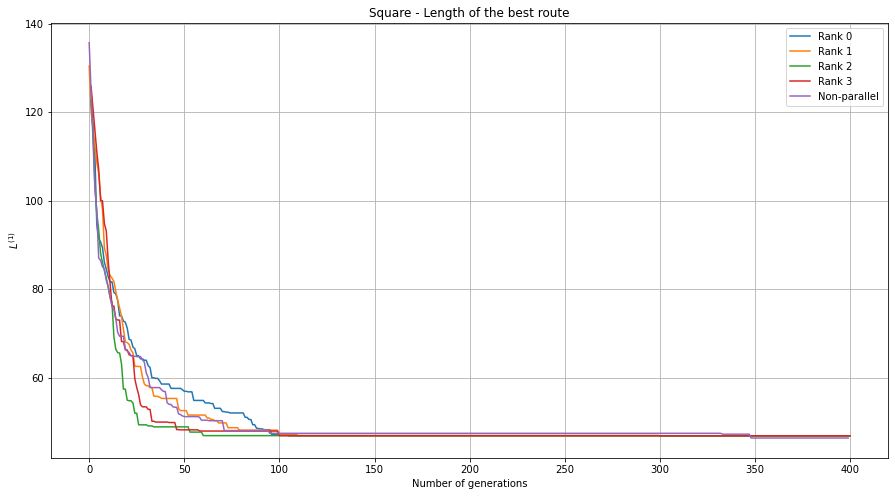

Best length for the Rank 0 :  46.8713  after 3000.0  generations
Best length for the Rank 1 :  46.8713  after 3000.0  generations
Best length for the Rank 2 :  46.8713  after 3000.0  generations
Best length for the Rank 3 :  46.8713  after 3000.0  generations


In [117]:
fig= plt.figure(figsize=(15,8))
gen_sq_0, l_sq_0 = np.loadtxt("data/data_10.2/rank0/Best_lengths.dat", usecols=(0,1), skiprows = 102459, max_rows = 400, unpack=True)
gen_sq_1, l_sq_1 = np.loadtxt("data/data_10.2/rank1/Best_lengths.dat", usecols=(0,1), skiprows = 102535, max_rows = 400, unpack=True)
gen_sq_2, l_sq_2 = np.loadtxt("data/data_10.2/rank2/Best_lengths.dat", usecols=(0,1), skiprows = 102324, max_rows = 400, unpack=True)
gen_sq_3, l_sq_3 = np.loadtxt("data/data_10.2/rank3/Best_lengths.dat", usecols=(0,1), skiprows = 102732, max_rows = 400, unpack=True)
gen_sq_np, l_sq_np = np.loadtxt("../Lab9/data/square/final/Best_lengths.dat", usecols=(0,1), max_rows = 400, unpack=True)
    
plt.plot(gen_sq_0, l_sq_0, label="Rank 0")
plt.plot(gen_sq_1, l_sq_1, label="Rank 1")
plt.plot(gen_sq_2, l_sq_2, label="Rank 2")
plt.plot(gen_sq_3, l_sq_3, label="Rank 3")
plt.plot(gen_sq_np, l_sq_np, label="Non-parallel")
plt.xlabel('Number of generations')
plt.ylabel("$L^{(1)}$")
plt.title('Square - Length of the best route')
    

plt.grid(True)
plt.legend()
plt.show()


for rank in range (4):
    gen, best = np.loadtxt("data/data_10.2/rank" + str(rank) + "/Best_lengths.dat", usecols=(0,1), unpack=True)
    print("Best length for the Rank",rank,": ", best[-1], " after", gen[-1], " generations")

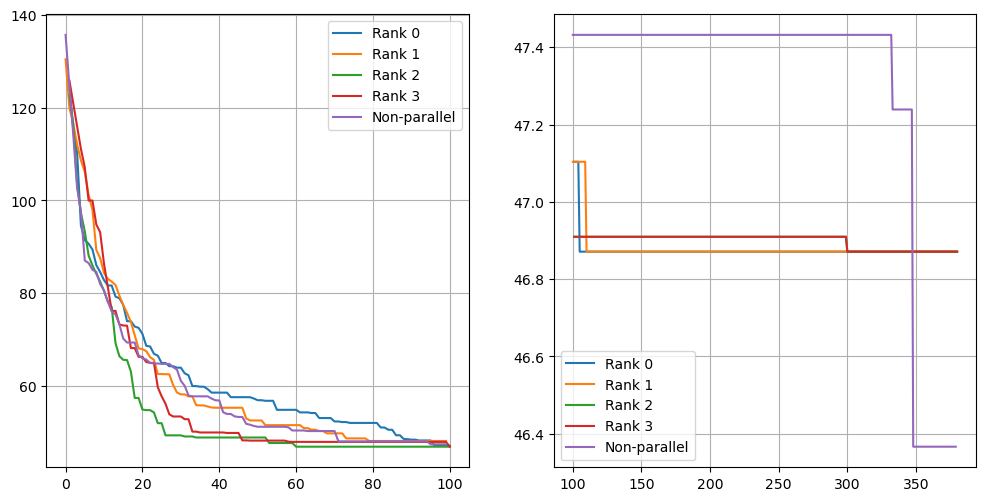

In [118]:
fig, pp = plt.subplots(1, 2, figsize=(12,6),dpi=100)
gen_sq_0, l_sq_0 = np.loadtxt("data/data_10.2/rank0/Best_lengths.dat", usecols=(0,1), skiprows = 102459, max_rows = 100, unpack=True)
gen_sq_1, l_sq_1 = np.loadtxt("data/data_10.2/rank1/Best_lengths.dat", usecols=(0,1), skiprows = 102535, max_rows = 100, unpack=True)
gen_sq_2, l_sq_2 = np.loadtxt("data/data_10.2/rank2/Best_lengths.dat", usecols=(0,1), skiprows = 102324, max_rows = 100, unpack=True)
gen_sq_3, l_sq_3 = np.loadtxt("data/data_10.2/rank3/Best_lengths.dat", usecols=(0,1), skiprows = 102732, max_rows = 100, unpack=True)
gen_sq_np, l_sq_np = np.loadtxt("../Lab9/data/square/final/Best_lengths.dat", usecols=(0,1), max_rows = 100, unpack=True)

gen_sq_00, l_sq_00 = np.loadtxt("data/data_10.2/rank0/Best_lengths.dat", usecols=(0,1), skiprows = 102559, max_rows = 280, unpack=True)
gen_sq_11, l_sq_11 = np.loadtxt("data/data_10.2/rank1/Best_lengths.dat", usecols=(0,1), skiprows = 102635, max_rows = 280, unpack=True)
gen_sq_22, l_sq_22 = np.loadtxt("data/data_10.2/rank2/Best_lengths.dat", usecols=(0,1), skiprows = 102424, max_rows = 280, unpack=True)
gen_sq_33, l_sq_33 = np.loadtxt("data/data_10.2/rank3/Best_lengths.dat", usecols=(0,1), skiprows = 102832, max_rows = 280, unpack=True)
gen_sq_npp, l_sq_npp = np.loadtxt("../Lab9/data/square/final/Best_lengths.dat", usecols=(0,1), skiprows = 100, max_rows = 280, unpack=True)
    

pp[0].plot(gen_sq_0, l_sq_0, label="Rank 0")
pp[0].plot(gen_sq_1, l_sq_1, label="Rank 1")
pp[0].plot(gen_sq_2, l_sq_2, label="Rank 2")
pp[0].plot(gen_sq_3, l_sq_3, label="Rank 3")
pp[0].plot(gen_sq_np, l_sq_np, label="Non-parallel") 
pp[0].grid(True)
pp[0].legend()
    
pp[1].plot(gen_sq_00, l_sq_00, label="Rank 0")
pp[1].plot(gen_sq_11, l_sq_11, label="Rank 1")
pp[1].plot(gen_sq_22, l_sq_22, label="Rank 2")
pp[1].plot(gen_sq_33, l_sq_33, label="Rank 3")
pp[1].plot(gen_sq_npp, l_sq_npp, label="Non-parallel")
pp[1].grid(True)
pp[1].legend()
    
plt.show()

We can observe that the technique of parallelizing the code makes the trend faster; indeed in the last plot the single nodes have a better behaviour than the single non parallelized node. On the other hand we have to say that, despite the velocity of the trend is greater, the parallel code does not reach the best result obtained by the GA algorithm in exercise 9.
A possible reason is that the information passing between nodes is destructive, i.e. after a migration the node have to restart the optimization from a point that could be worse than the point reached previously. But also this assumption is falsified since we tried to change the migration rate (we used $N_{migr} = 10, 50, 200, 300$) and didn't find a value that led to a better value of the route length. We also changed the number of nodes in the parallel mode, but neither using 2 nodes the result improved. 